### Importing Libraries

In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and Understandnig the Data

In [3]:
# Read the Dataset

bike = pd.read_csv('day.csv')

In [4]:
#Checking the dataframe

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the information on the dataset

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking the shape of the dataframe 

bike.shape

(730, 16)

In [7]:
#Checking the numerical columns data distribution statistics

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Checking for any Missing values

bike.isna().sum()

#There are no missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Dropping instant, dteday, casual and registered columns

bike.drop(['instant', 'dteday', 'casual', 'registered'], axis =1, inplace =True)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Encoding and Visualizing the data

In [11]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [12]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

#### 1). Season : Converting season values as per criteria
1. spring
2. summer
3. fall
4. winter

In [13]:
# Converting Season

season_convert = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season'] = bike['season'].map(season_convert)

In [14]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


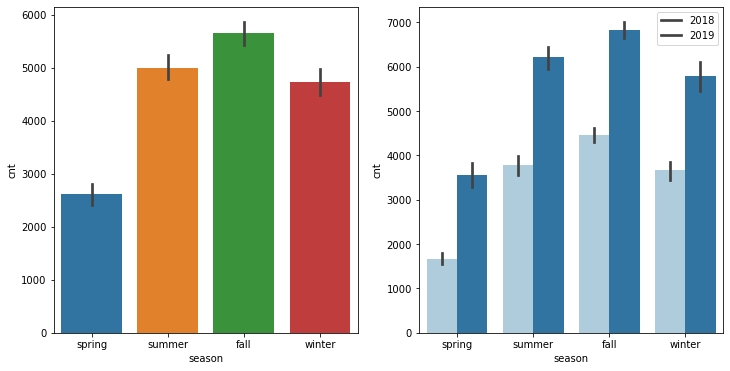

In [16]:
categorical_plot('season',12,6)

#### 2). Weathermist : Converting weathersit calues as per criteria
1. clear
2. misty
3. heavy rain

In [17]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
# Converting weathersit

weather = {1:'clear', 2:'misty', 3:'heavy rain'}
bike['weathersit'] = bike['weathersit'].map(weather)

In [19]:
bike.weathersit.value_counts()

clear         463
misty         246
heavy rain     21
Name: weathersit, dtype: int64

In [20]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
clear,2257952,4876.79,463,68.61,63.42
misty,995024,4044.81,246,30.24,33.70
heavy rain,37869,1803.29,21,1.15,2.88


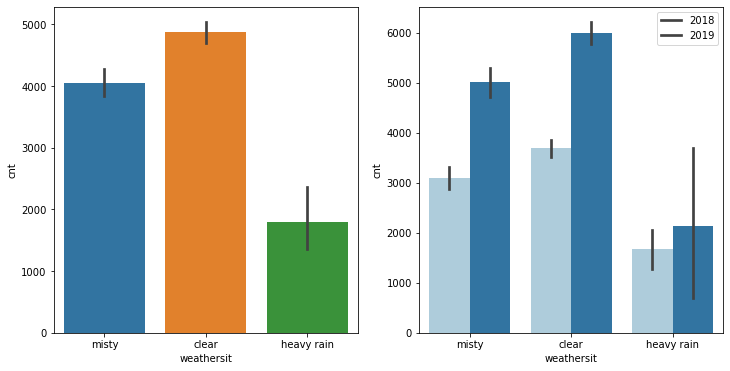

In [21]:
categorical_plot('weathersit',12,6)

#### 3). Month : Converting month values as per criteria
1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec


In [22]:
# Converting Month

month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'sep', 10 :'Oct', 11:'Nov', 12:'Dec'}
bike['mnth'] = bike['mnth'].map(month)

In [23]:
bike.mnth.value_counts()

Oct    62
Jan    62
Dec    62
Aug    62
Jul    62
May    62
Mar    62
sep    60
Jun    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [24]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


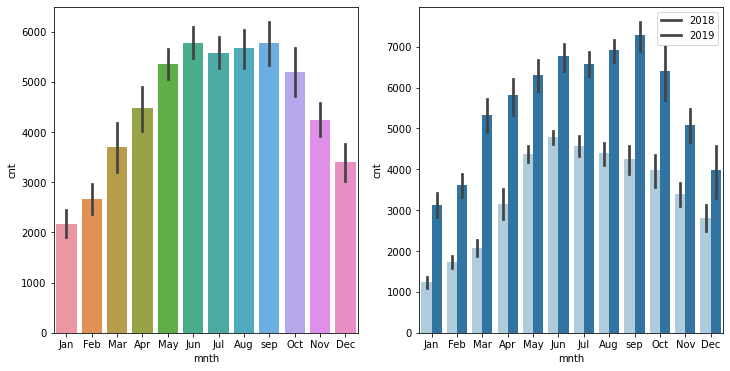

In [25]:
categorical_plot('mnth', 12,6)

#### 4). Weekday : Converting weekday values as per criteria
0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [26]:
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [27]:
# Converting weekday

weekdays = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
bike['weekday'] = bike['weekday'].map(weekdays)

In [28]:
bike.weekday.value_counts()

Mon    105
Tue    105
Fri    104
Sat    104
Thu    104
Sun    104
Wed    104
Name: weekday, dtype: int64

In [29]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thu,487923,4691.57,104,14.83,14.25
Sun,485235,4665.72,104,14.74,14.25
Sat,481176,4626.69,104,14.62,14.25
Fri,478132,4597.42,104,14.53,14.25
Wed,462276,4444.96,104,14.05,14.25
Tue,448822,4274.50,105,13.64,14.38
Mon,447281,4259.82,105,13.59,14.38


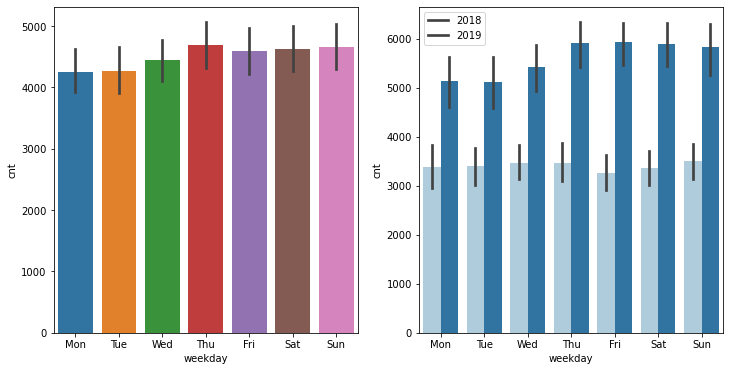

In [30]:
categorical_plot('weekday',12,6)

In [31]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


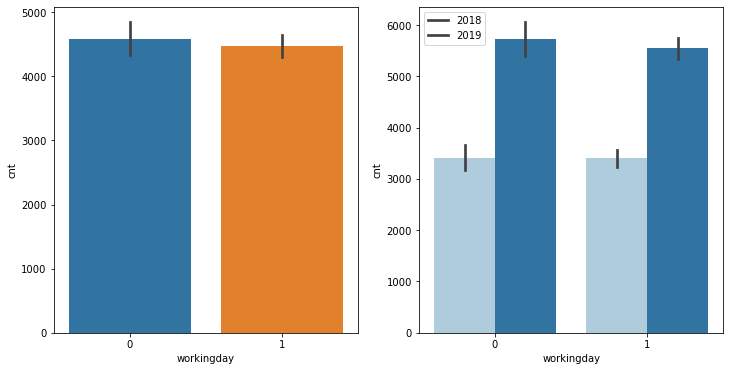

In [32]:
categorical_plot('workingday',12,6)

In [33]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 3: Visualizing the Realtionship among variables

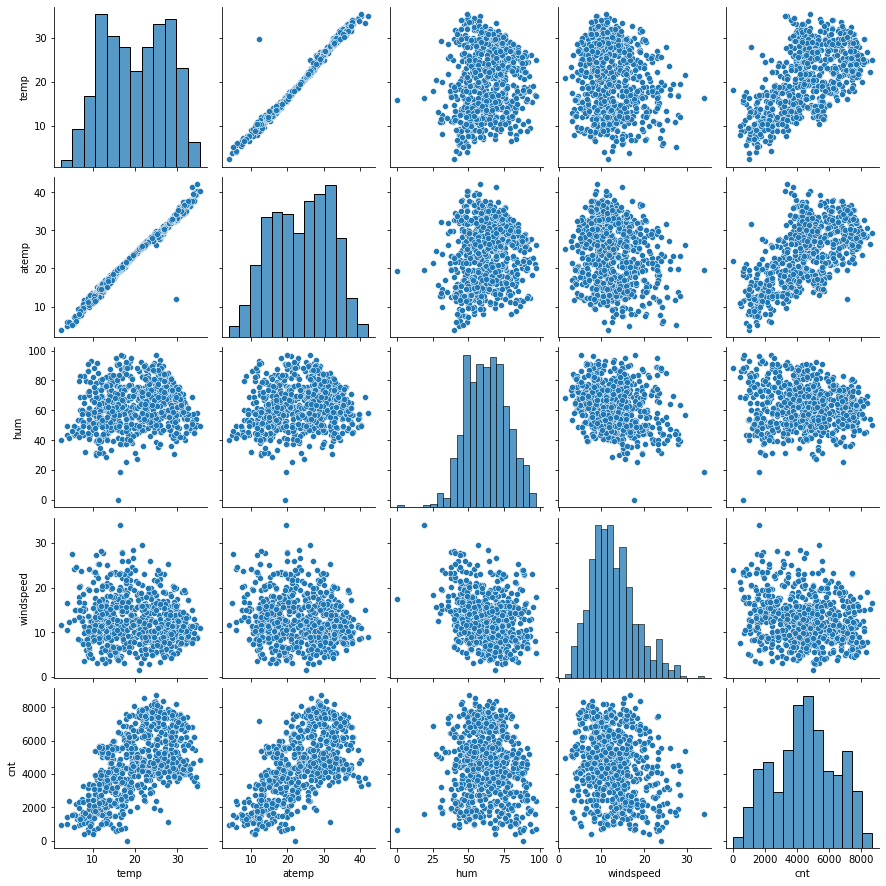

In [34]:
#Generating pairplot to check the relationships between numeric variables variables

bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

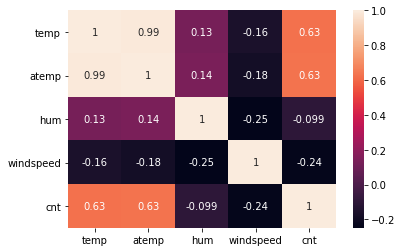

In [35]:
#Checking the correlation for the above variables

sns.heatmap(bike_num.corr(), annot = True)
plt.show()

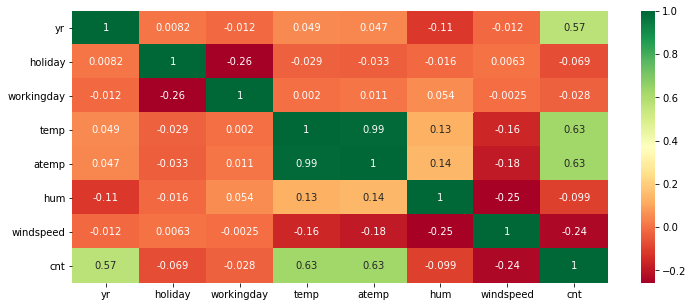

In [36]:
# Checking correlation by heatmap

plt.figure(figsize = [12,5])
sns.heatmap(bike.corr(), annot = True,cmap="RdYlGn")
plt.show()

### Step 4: Data Preparation

#### Creating Dummy Variabes

In [37]:
# 1. Creating dummy variables for season

season = pd.get_dummies(bike['season'], drop_first = True)

In [38]:
season.head(5)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
# 2. Creating dummy variable for weathersit

weather = pd.get_dummies(bike['weathersit'], drop_first = True) 

In [40]:
weather.head(5)

,heavy rain,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [41]:
# 3. Creating dummy variable for month

In [42]:
month = pd.get_dummies(bike['mnth'], drop_first = True)

In [43]:
month.head(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [44]:
# 4. Creating dummy variable for weekday

weekday = pd.get_dummies(bike['weekday'], drop_first =True)

In [45]:
weekday.head(5)

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [46]:
bike.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,misty,14.902598,17.68695,69.6087,16.652113,801


#### Merging the Dataframes

In [47]:
bike = pd.concat([bike,season,weather,month,weekday], axis= 1)

In [48]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,1,misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [49]:
bike.shape


(730, 34)

In [50]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'heavy rain', 'misty', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'sep', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [51]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  heavy rain  730 non-null    uint8  
 16  misty       730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Dec         730 non-null    uint8  
 19  Feb         730 non-null    u

#### Removing Unwanted Columns

In [52]:
# Dropping the Categorical Variables as they are alredy dummy encoded\

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace =True)

In [53]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'heavy rain', 'misty', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [54]:
bike.shape

(730, 30)

In [55]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  heavy rain  730 non-null    uint8  
 12  misty       730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  Jul         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Mar         730 non-null    u

### Step 4: Splitting the data into Train and Test

#### Splitting the data

In [56]:


np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state =100)

In [57]:
print(df_test.shape)
print(df_train.shape)

(220, 30)
(510, 30)


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Rescalling the train dataframe

In [60]:

scaler = MinMaxScaler()

In [61]:
df_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
#Apply scaler() to all the columns except the dummy variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [63]:
#Checking after rescalling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


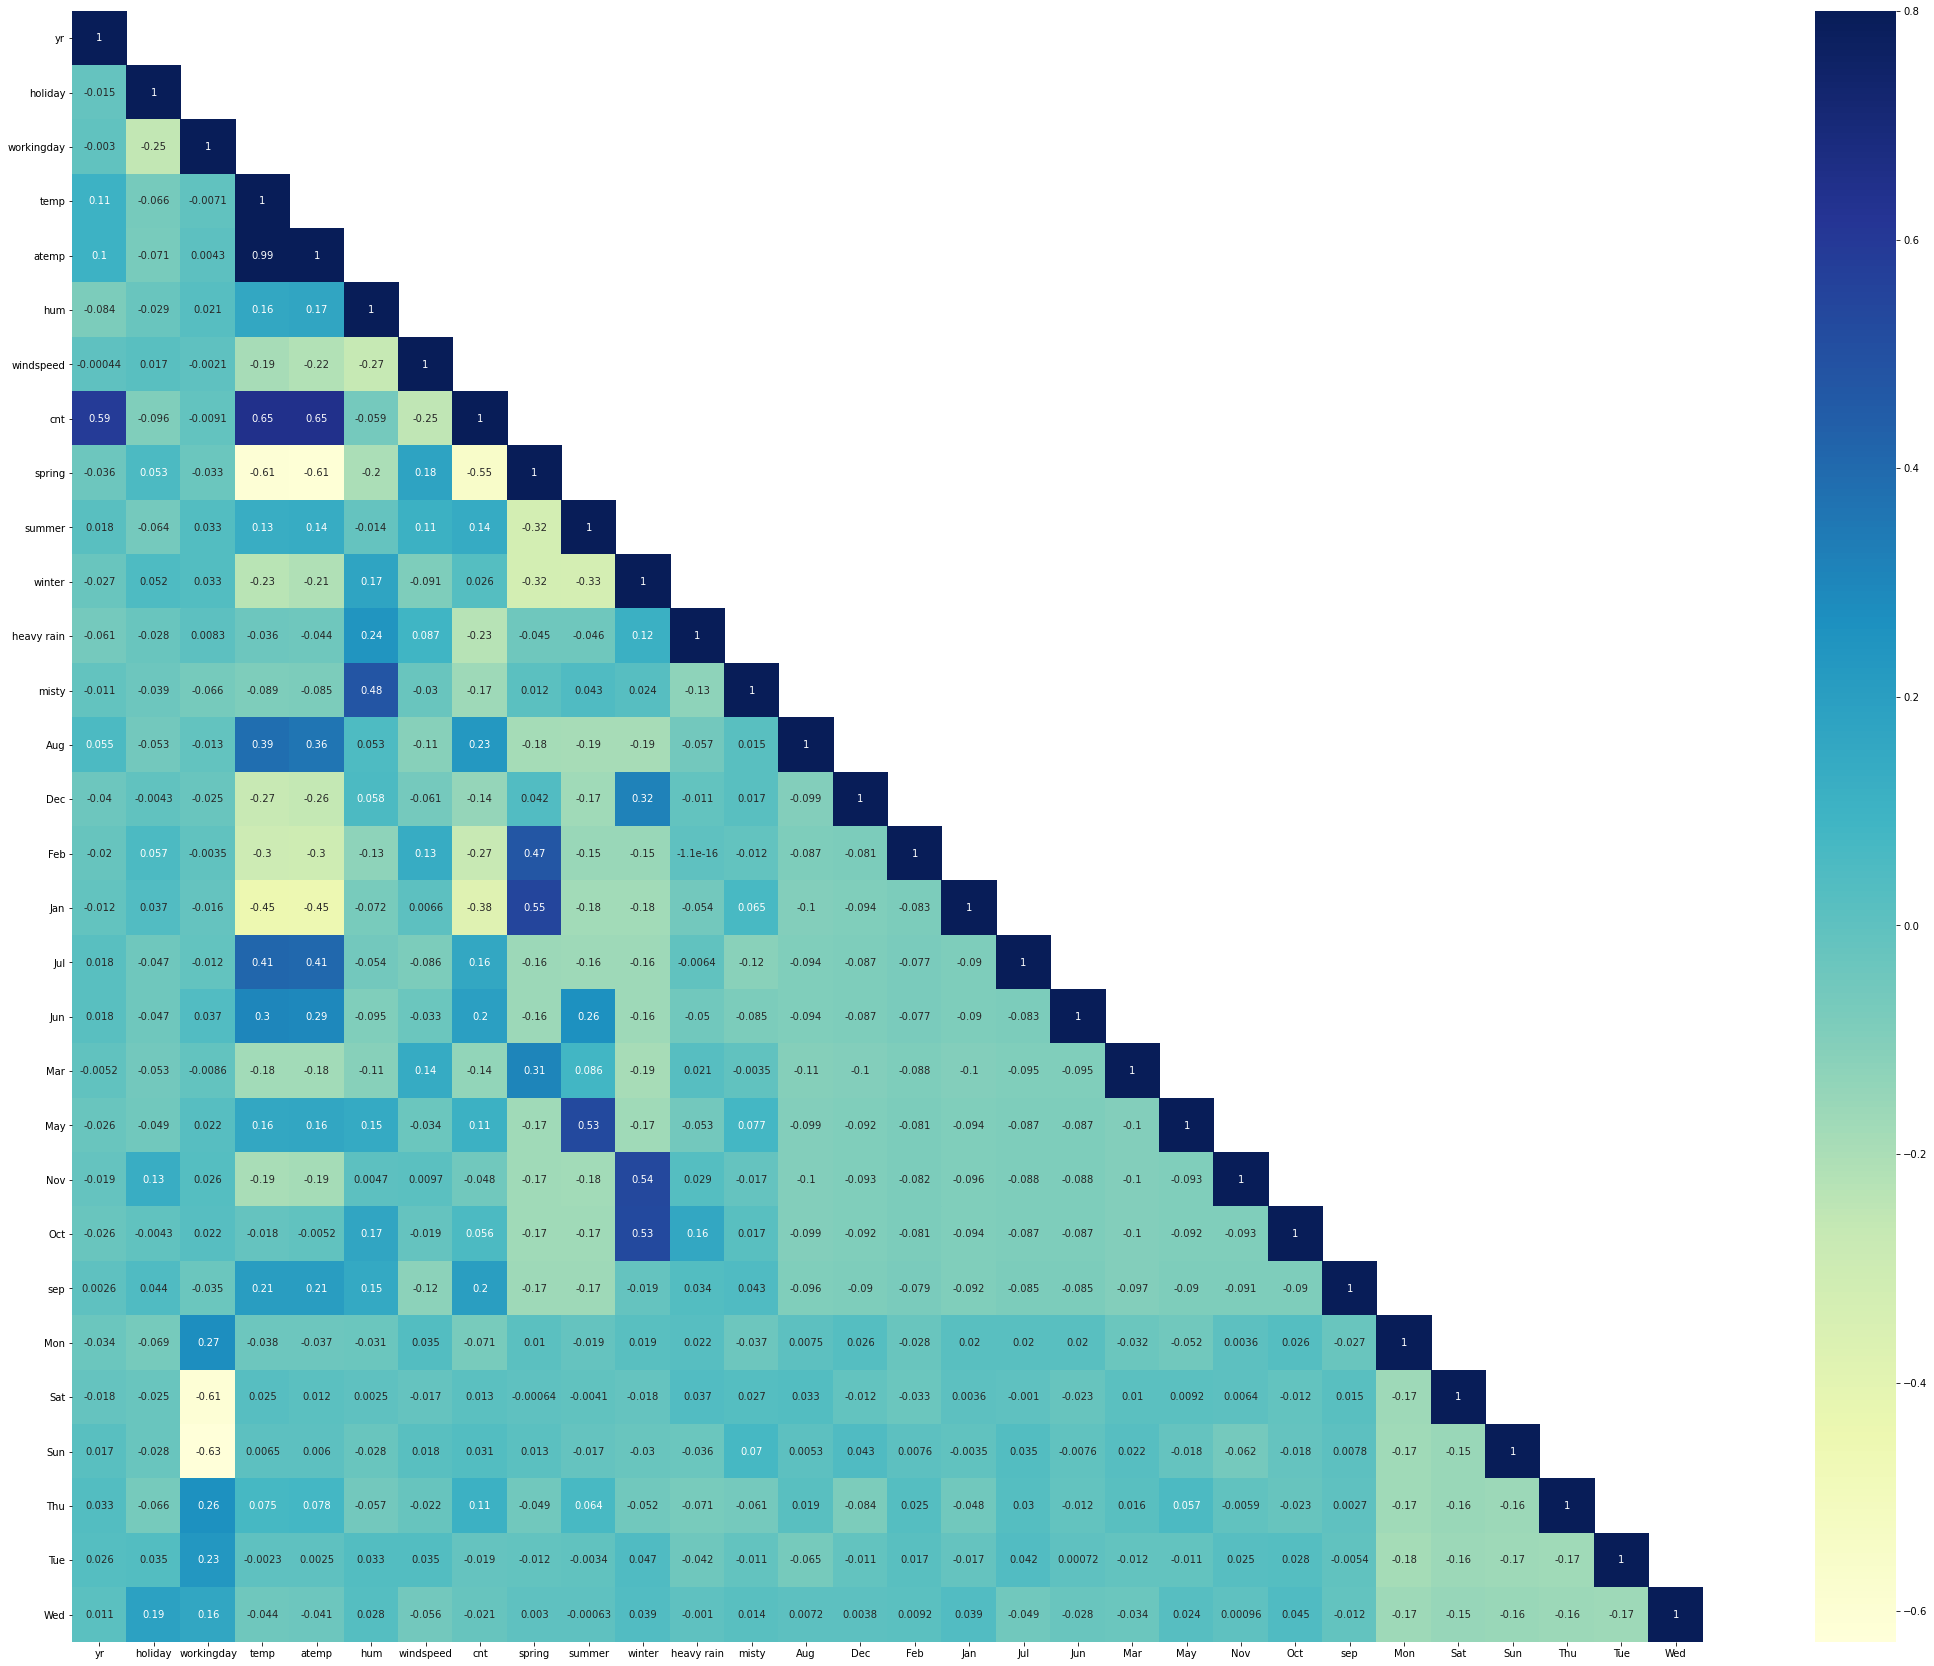

In [64]:
plt.figure(figsize = [40,30] )
mask = np.array(df_train.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_train.corr(), mask=mask, vmax=.8, square=True, annot=True, cmap = 'YlGnBu');
plt.show()

### Step 6: Building the Linear Model

In [65]:
# Divide in X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

#### RFE 
##### Using Recursive feature elimination(RFE) which is an automated featured selection approach

In [66]:
# Running RFE with the output number of the variable equal to 15


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [67]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('heavy rain', True, 1),
 ('misty', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11)]

In [68]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'heavy rain', 'misty', 'Dec', 'Jan', 'Jul', 'Nov', 'sep'],
      dtype='object')

In [69]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [70]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [71]:
X_train_rfe.shape

(510, 15)

### Model 1

#### VIF Check

In [72]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
9,misty,2.32
0,yr,2.09
13,Nov,1.85
11,Jan,1.75


In [73]:
# Adding a constant variable

X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Print a summary of the linear regression model obtained
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        22:12:27   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

### Model 2 

#### Removing the variable 'hum' , since it has very high VIF

In [74]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

#### VIF Check

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
12,Nov,1.81
10,Jan,1.66
11,Jul,1.59
8,misty,1.57


In [76]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.75e-186
Time:                        22:12:27   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

### Model 3

#### Removing the variable 'Nov' based on High p-value

In [77]:
X_train_3 = X_train_new.drop(["Nov"], axis = 1)

#### VIF Check

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
10,Jan,1.65
11,Jul,1.59
8,misty,1.57
12,sep,1.34


In [79]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.74e-186
Time:                        22:12:27   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

### Model 4

#### Removing the variable 'Dec' which has very High p-value

In [80]:
X_train_4 = X_train_3.drop(["Dec"], axis = 1)

#### VIF Check

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
9,Jan,1.61
10,Jul,1.59
8,misty,1.56
11,sep,1.34


In [82]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.14e-187
Time:                        22:12:28   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

### Model 5

#### Removing the variable 'Jan' which has High p-value

In [83]:
X_train_5 = X_train_4.drop(["Jan"], axis = 1)

#### VIF Check

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,Jul,1.58
8,misty,1.55
10,sep,1.34
7,heavy rain,1.08


In [85]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.06e-187
Time:                        22:12:28   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

### Model 6

#### Removing variable 'Jul' which has a High p-value

In [86]:
X_train_6 = X_train_5.drop(["Jul"], axis = 1)

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,misty,1.55
9,sep,1.23
7,heavy rain,1.08
1,holiday,1.04


In [88]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.47e-186
Time:                        22:12:28   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

#### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

lr6 model coefficient values

- const          0.1909      
- yr             0.2341      
- holiday       -0.0963    
- temp           0.4777    
- windspeed     -0.1481      
- spring        -0.0554     
- summer         0.0621      
- winter         0.0945    
- heavy rain    -0.2850   
- misty         -0.0787      
- sep            0.0910  


#### Insights
- From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

#### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 248.4
- Prob (F-statistic): 1.47e-186
The F-Statistics value of 248 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr6:

cnt = 0.1909 + (yr * 0.2341)-(holiday * .09603)+(temp * 0.4777)-(windspeed     * 0.1481)-(spring * 0.0554)+(summer * 0.0621)+(winter * 0.0945)-(heavy rain     * 0.2850)-(misty * 0.0787)+(sep * 0.0910) 

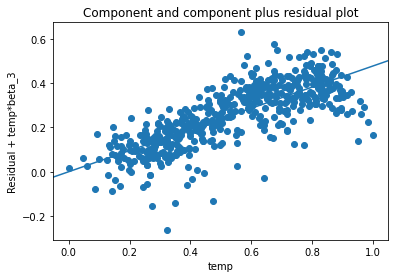

In [89]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

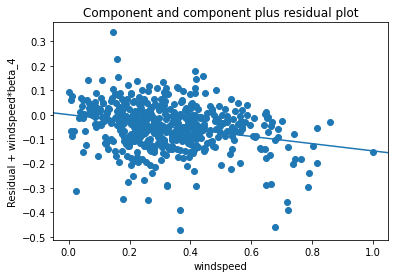

In [90]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

### Step 7: Residual Analysis

In [91]:
y_train_pred = lr6.predict(X_train_lm6)

In [92]:
y_train_pred

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
         ...   
578    0.810023
53     0.215752
350    0.261221
79     0.316747
520    0.641815
Length: 510, dtype: float64

In [93]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

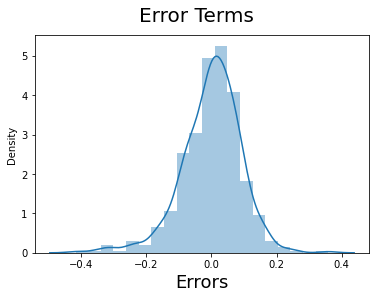

In [94]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

#### Insight: 
- Based on the histogram, we can conclude that error terms are following a normal distribution

### Step 8: Making Predictions

#### Applying the scaling on test sets

In [95]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [96]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [97]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing X_test and y_test

In [98]:
y_test = df_test.pop('cnt')
X_test = df_test

In [99]:
#Selecting the variables that were part of final model.
col1=X_train_6.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   temp        220 non-null    float64
 4   windspeed   220 non-null    float64
 5   spring      220 non-null    uint8  
 6   summer      220 non-null    uint8  
 7   winter      220 non-null    uint8  
 8   heavy rain  220 non-null    uint8  
 9   misty       220 non-null    uint8  
 10  sep         220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [100]:
# Making predictions using the final model (lr6)
y_test_pred = lr6.predict(X_test_lm6)

### Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

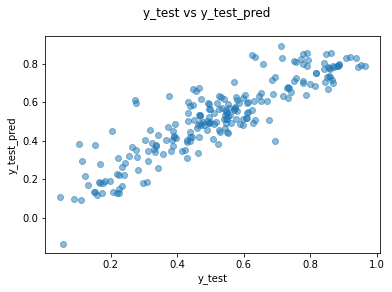

In [101]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_test_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred') 

### R^2 Value for test data

In [102]:
r2_score(y_test, y_test_pred)
r2 = round(r2_score(y_test, y_test_pred),4)
r2

0.8038

In [103]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7944124401913875

#### Model train and test R^2 Comparision
| Measurement | Train Dataset | Test Dataset |
| --- | --- | --- |
| R^2 Value | 83.3% | 80.38% |
| Adjusted R^2 Value | 82.9% | 79.4% |

It seems to be really a good model that can generalize various datasets


### Calculating Root Mean Square Error for the model

In [104]:
RMSE = round(sqrt(mean_squared_error(y_test, y_test_pred)),4)
RMSE

0.0969

### Calculating Mean Absolute Error for the model

In [105]:
MAE = round(mean_absolute_error(y_test, y_test_pred),4)
MAE

0.0736

#### Insight:
- The Root Mean Squared Error value for the test dataset based on final model is 0.0969
- Mean Absolute Error is 0.0736, which indicates that the model is really good.

## Conclusion

As per the final model, the top 3 predictor variables that influences bike booking are:

1. Temperature (Temp): <br>
A coefficient value of ‘0.4777’ indicates that temperature has a significant impact on bike rentals
2. Heavy Rain (weathersit = 3): <br>
A coefficient value of ‘-0.285’ indicates that heavy rain avoids people from renting out bikes
3. Year (yr): <br>
A coefficient value of ‘0.2341’ indicates that year wise the rental numbers are increasing

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.
As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.

#### NOTE:
So, it is suggested to consider the above 3 variables since it is utmost important while planning, to achive maximum Booking
The next best features that can also be considered are:
1. Windspeed (windspeed): <br> A coefficient value of ‘-0.1481’ indicates that windspeed has a very less likely to affect the bike rentals
2. Winter (season = 4): <br> A coefficient value of ‘0.0945’ indicates that winter is also a good season for bike rentals

#### Finally, The Assumptions of Linear Regression are: <br> 
- The error terms are normally distributed. 
- The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation. 
- The predicted values have linear relationship with the actual values.